In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
% matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

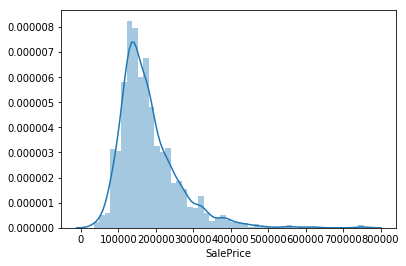

In [5]:
sns.distplot(df_train['SalePrice'])

In [8]:
print('Skewness %f' % df_train['SalePrice'].skew())
print('kurtosis %f' % df_train['SalePrice'].kurt())

Skewness 1.882876
kurtosis 6.536282


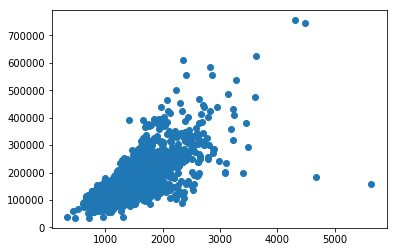

In [13]:
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])


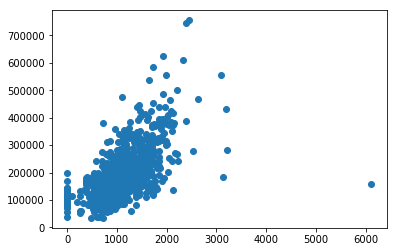

In [14]:
plt.scatter(x=df_train['TotalBsmtSF'],y=df_train['SalePrice'])


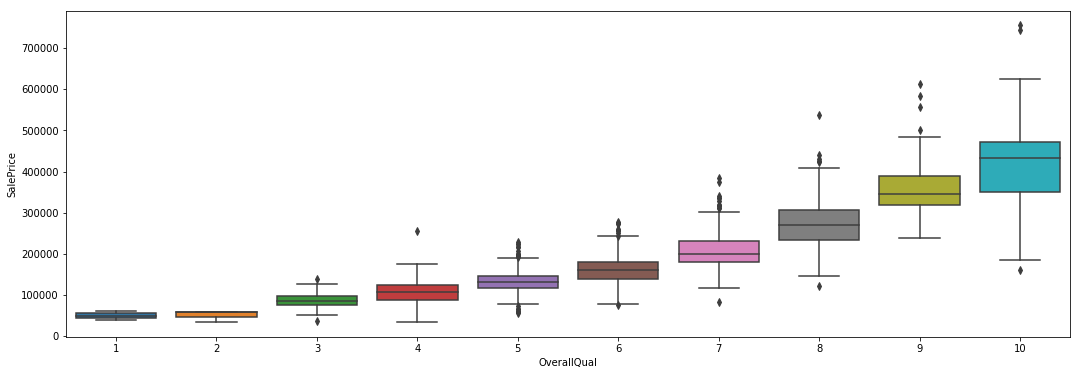

In [15]:
plt.figure(figsize=(18,6))
sns.boxplot(x=df_train['OverallQual'],y=df_train['SalePrice'])

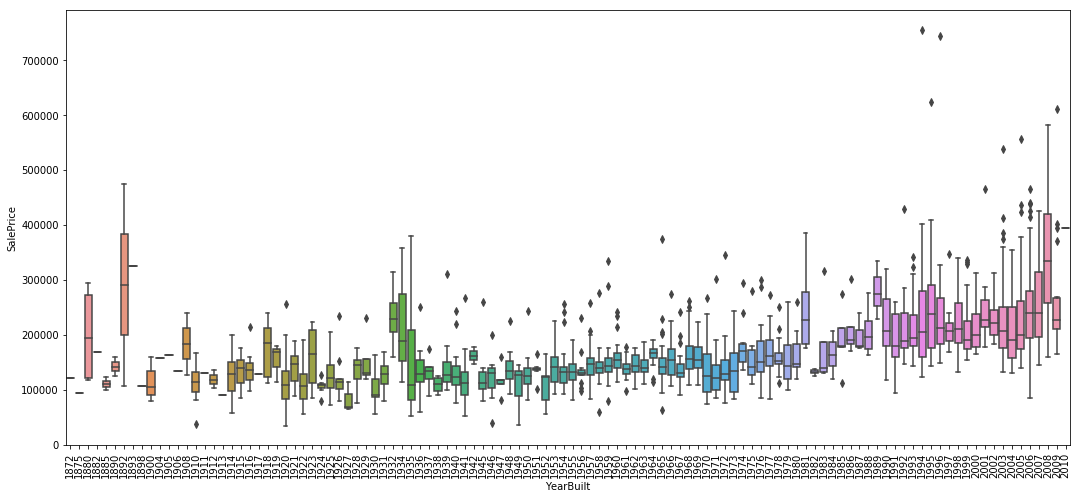

In [19]:
plt.figure(figsize=(18,8))
sns.boxplot(x=df_train['YearBuilt'],y=df_train['SalePrice'])
plt.xticks(rotation=90);

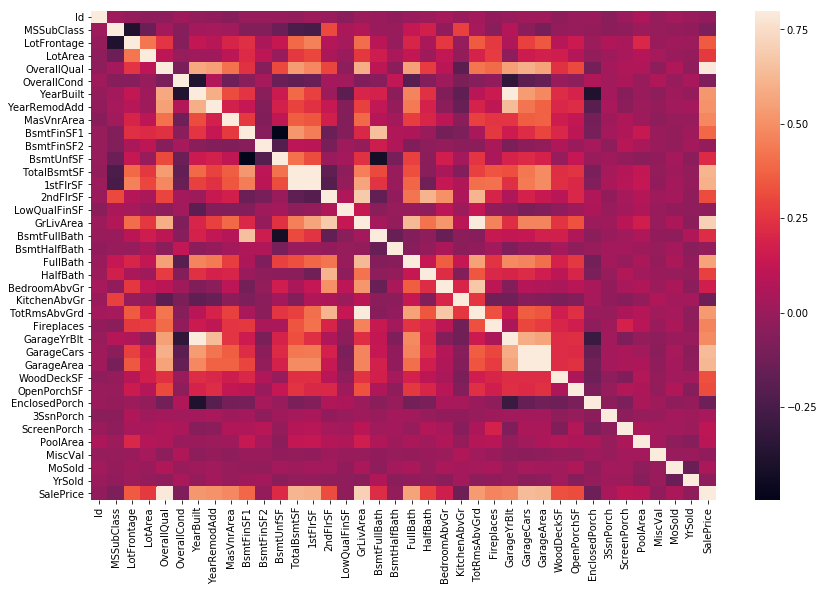

In [23]:
corrmat=df_train.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corrmat,vmax=0.8)
           

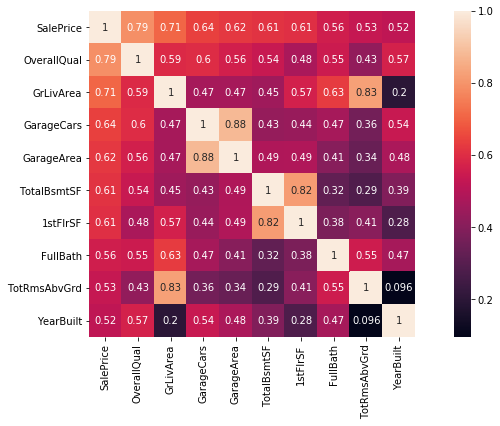

In [33]:
plt.figure(figsize=(14,6))
k=10
cols=corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,square=True,yticklabels=cols.values,xticklabels=cols.values)


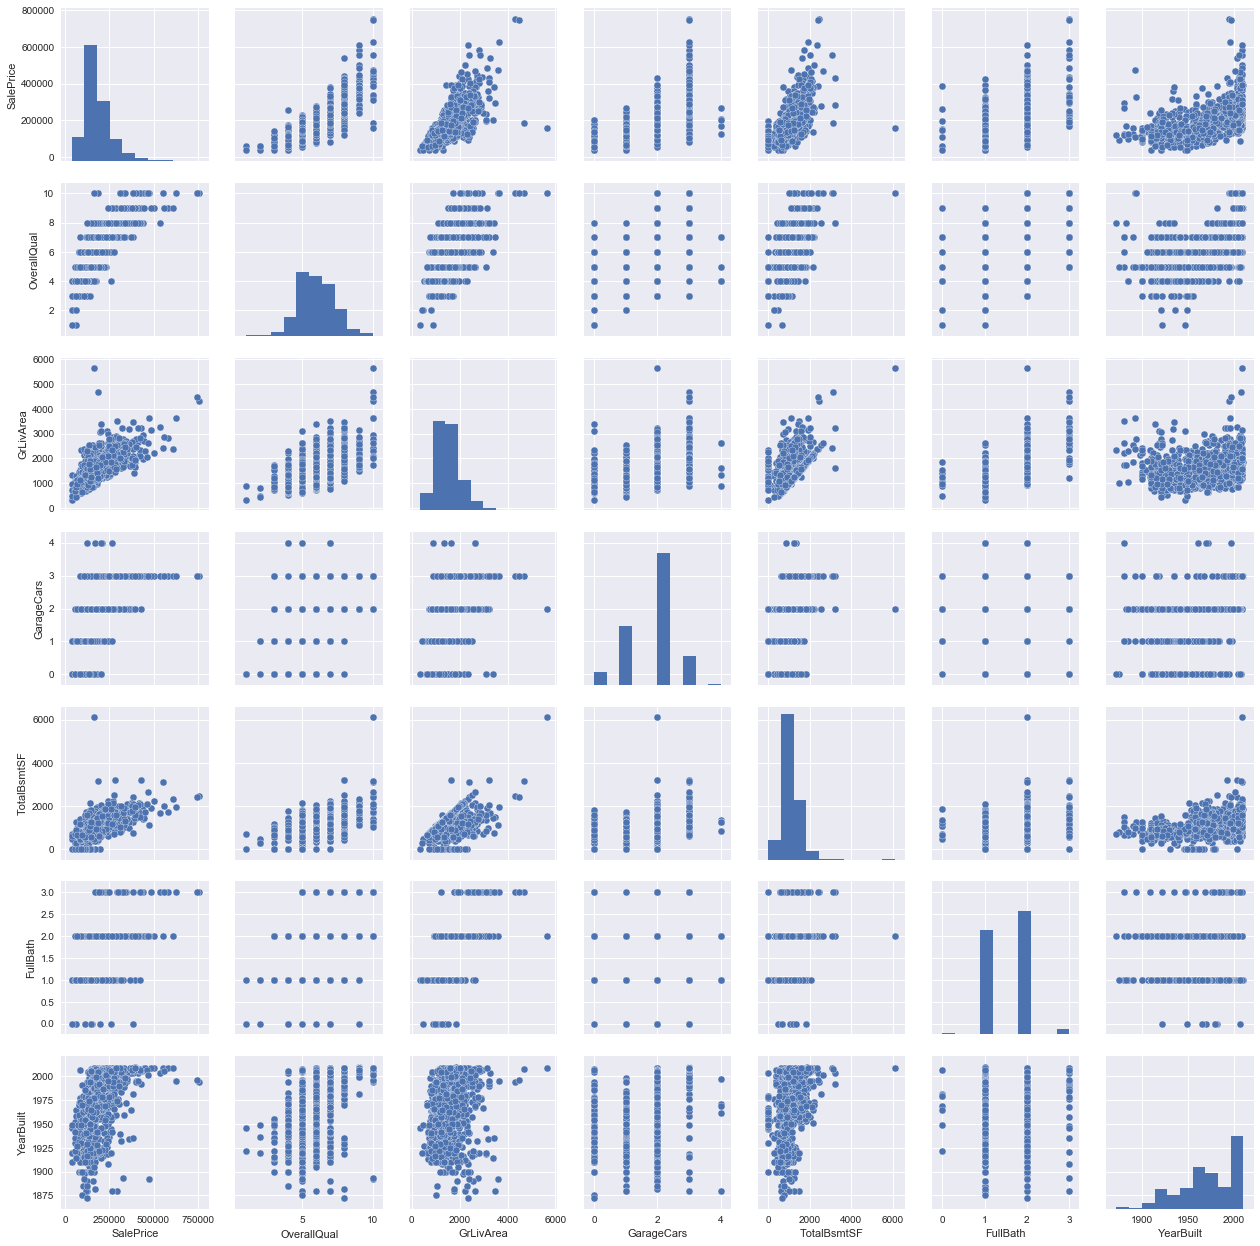

In [37]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set()
sns.pairplot(df_train[cols],size=2.5)


In [45]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [55]:
df_train=df_train.drop((missing_data[missing_data['Total']> 1]).index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0